In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h2>Read Data File

In [2]:
data = pd.read_csv('../data/Student_performance_data.csv')
display(data.head())

,StudentID,Name,Gender,ParentalSupport,PreviousGrade,StudyHoursPerWeek,ExtracurricularActivities,AttendanceRate,FinalGrade
0,0,Shaun Caldwell,Female,Medium,77.483571,24.996777,1,61.248217,79.324988
1,1,Michael Simmons,Male,Low,49.308678,16.623168,0,53.554813,56.435792
2,2,Bryan Snyder,Male,High,88.238443,25.298152,5,62.075801,94.707872
3,3,Justin Jacobs,Female,Low,57.615149,8.765316,1,50.000000,62.502877
4,4,Paul Holder,Female,Medium,73.829233,21.491117,2,50.000000,82.103799


<h2>Convert String to numeric data

In [3]:
length = len(data)
Parental_Support = np.array([
    0 if data['Parental Support'][i] == 'Low' 
    else 1 if data['Parental Support'][i] == 'Medium'
    else 2
    for i in range(length)
])

<h2>Add the new data 

In [4]:
data['Parental Support Numeric'] = Parental_Support
print(data.head())

   StudentID             Name  Gender ParentalSupport  PreviousGrade  \
0          0   Shaun Caldwell  Female          Medium      77.483571   
1          1  Michael Simmons    Male             Low      49.308678   
2          2     Bryan Snyder    Male            High      88.238443   
3          3    Justin Jacobs  Female             Low      57.615149   
4          4      Paul Holder  Female          Medium      73.829233   

   StudyHoursPerWeek  ExtracurricularActivities  AttendanceRate  FinalGrade  \
0          24.996777                          1       61.248217   79.324988   
1          16.623168                          0       53.554813   56.435792   
2          25.298152                          5       62.075801   94.707872   
3           8.765316                          1       50.000000   62.502877   
4          21.491117                          2       50.000000   82.103799   

   Parental Support Numeric  
0                         1  
1                         0  
2 

<h2>Allocating Features and target

In [5]:

features = np.array(
    [
    'Parental Support Numeric',
    'Previous Grade',
    'Study Hours Per Week',
    'Extracurricular Activities',
    'Attendance Rate',
]
)
target = np.array(['Final Grade'])

<h2>Read Features and Target Data

In [6]:
x = data[features]
print(x.head())

y = data[target]
print(y.head())

   Parental Support Numeric  Previous Grade  Study Hours Per Week  \
0                         1       77.483571             24.996777   
1                         2       84.308678             29.623168   
2                         1       78.238443             18.298152   
3                         1       82.615149             14.765316   
4                         0       48.829233             15.491117   

   Extracurricular Activities  Attendance Rate  
0                           5        53.248217  
1                           2        74.554813  
2                           5        52.075801  
3                           1        64.920385  
4                           4        50.000000  
   Final Grade
0    74.924988
1    99.000000
2    74.307872
3    89.178993
4    58.903799


<h2>Splitting Data for Test and Train

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state= None) #random_state = None gives Random data split everytime executed


<h2>Creating Test and Train Data set

In [8]:
data_train = pd.DataFrame()
data_train= x_train
data_train['Final Grade'] = y_train
print(data_train)

data_test = pd.DataFrame()
data_test = x_test
data_test['Final Grade'] = y_test
print(data_test)

data_train.to_csv('../data/train_data.csv')
data_test.to_csv('../data/test_data.csv')

     Parental Support Numeric  Previous Grade  Study Hours Per Week  \
839                         2       83.930056             23.959416   
878                         0       49.917886              3.582809   
530                         2       88.192962             25.704431   
549                         0       46.980074             18.134666   
37                          1       65.201649             10.678126   
..                        ...             ...                   ...   
218                         0       47.573182              7.823265   
277                         0       46.998916             13.966589   
799                         0       50.148781             12.106558   
342                         0       51.224833             14.184691   
965                         2       92.200586             25.447903   

     Extracurricular Activities  Attendance Rate  Final Grade  
839                           0        78.409548    99.000000  
878                

In [9]:
print(x_train.head())
print(y_train.head())

     Parental Support Numeric  Previous Grade  Study Hours Per Week  \
839                         2       83.930056             23.959416   
878                         0       49.917886              3.582809   
530                         2       88.192962             25.704431   
549                         0       46.980074             18.134666   
37                          1       65.201649             10.678126   

     Extracurricular Activities  Attendance Rate  Final Grade  
839                           0        78.409548    99.000000  
878                           4        50.000000    34.603022  
530                           1        82.736321    99.000000  
549                           1        73.884428    67.039829  
37                            5        54.910364    63.719838  
     Final Grade
839    99.000000
878    34.603022
530    99.000000
549    67.039829
37     63.719838


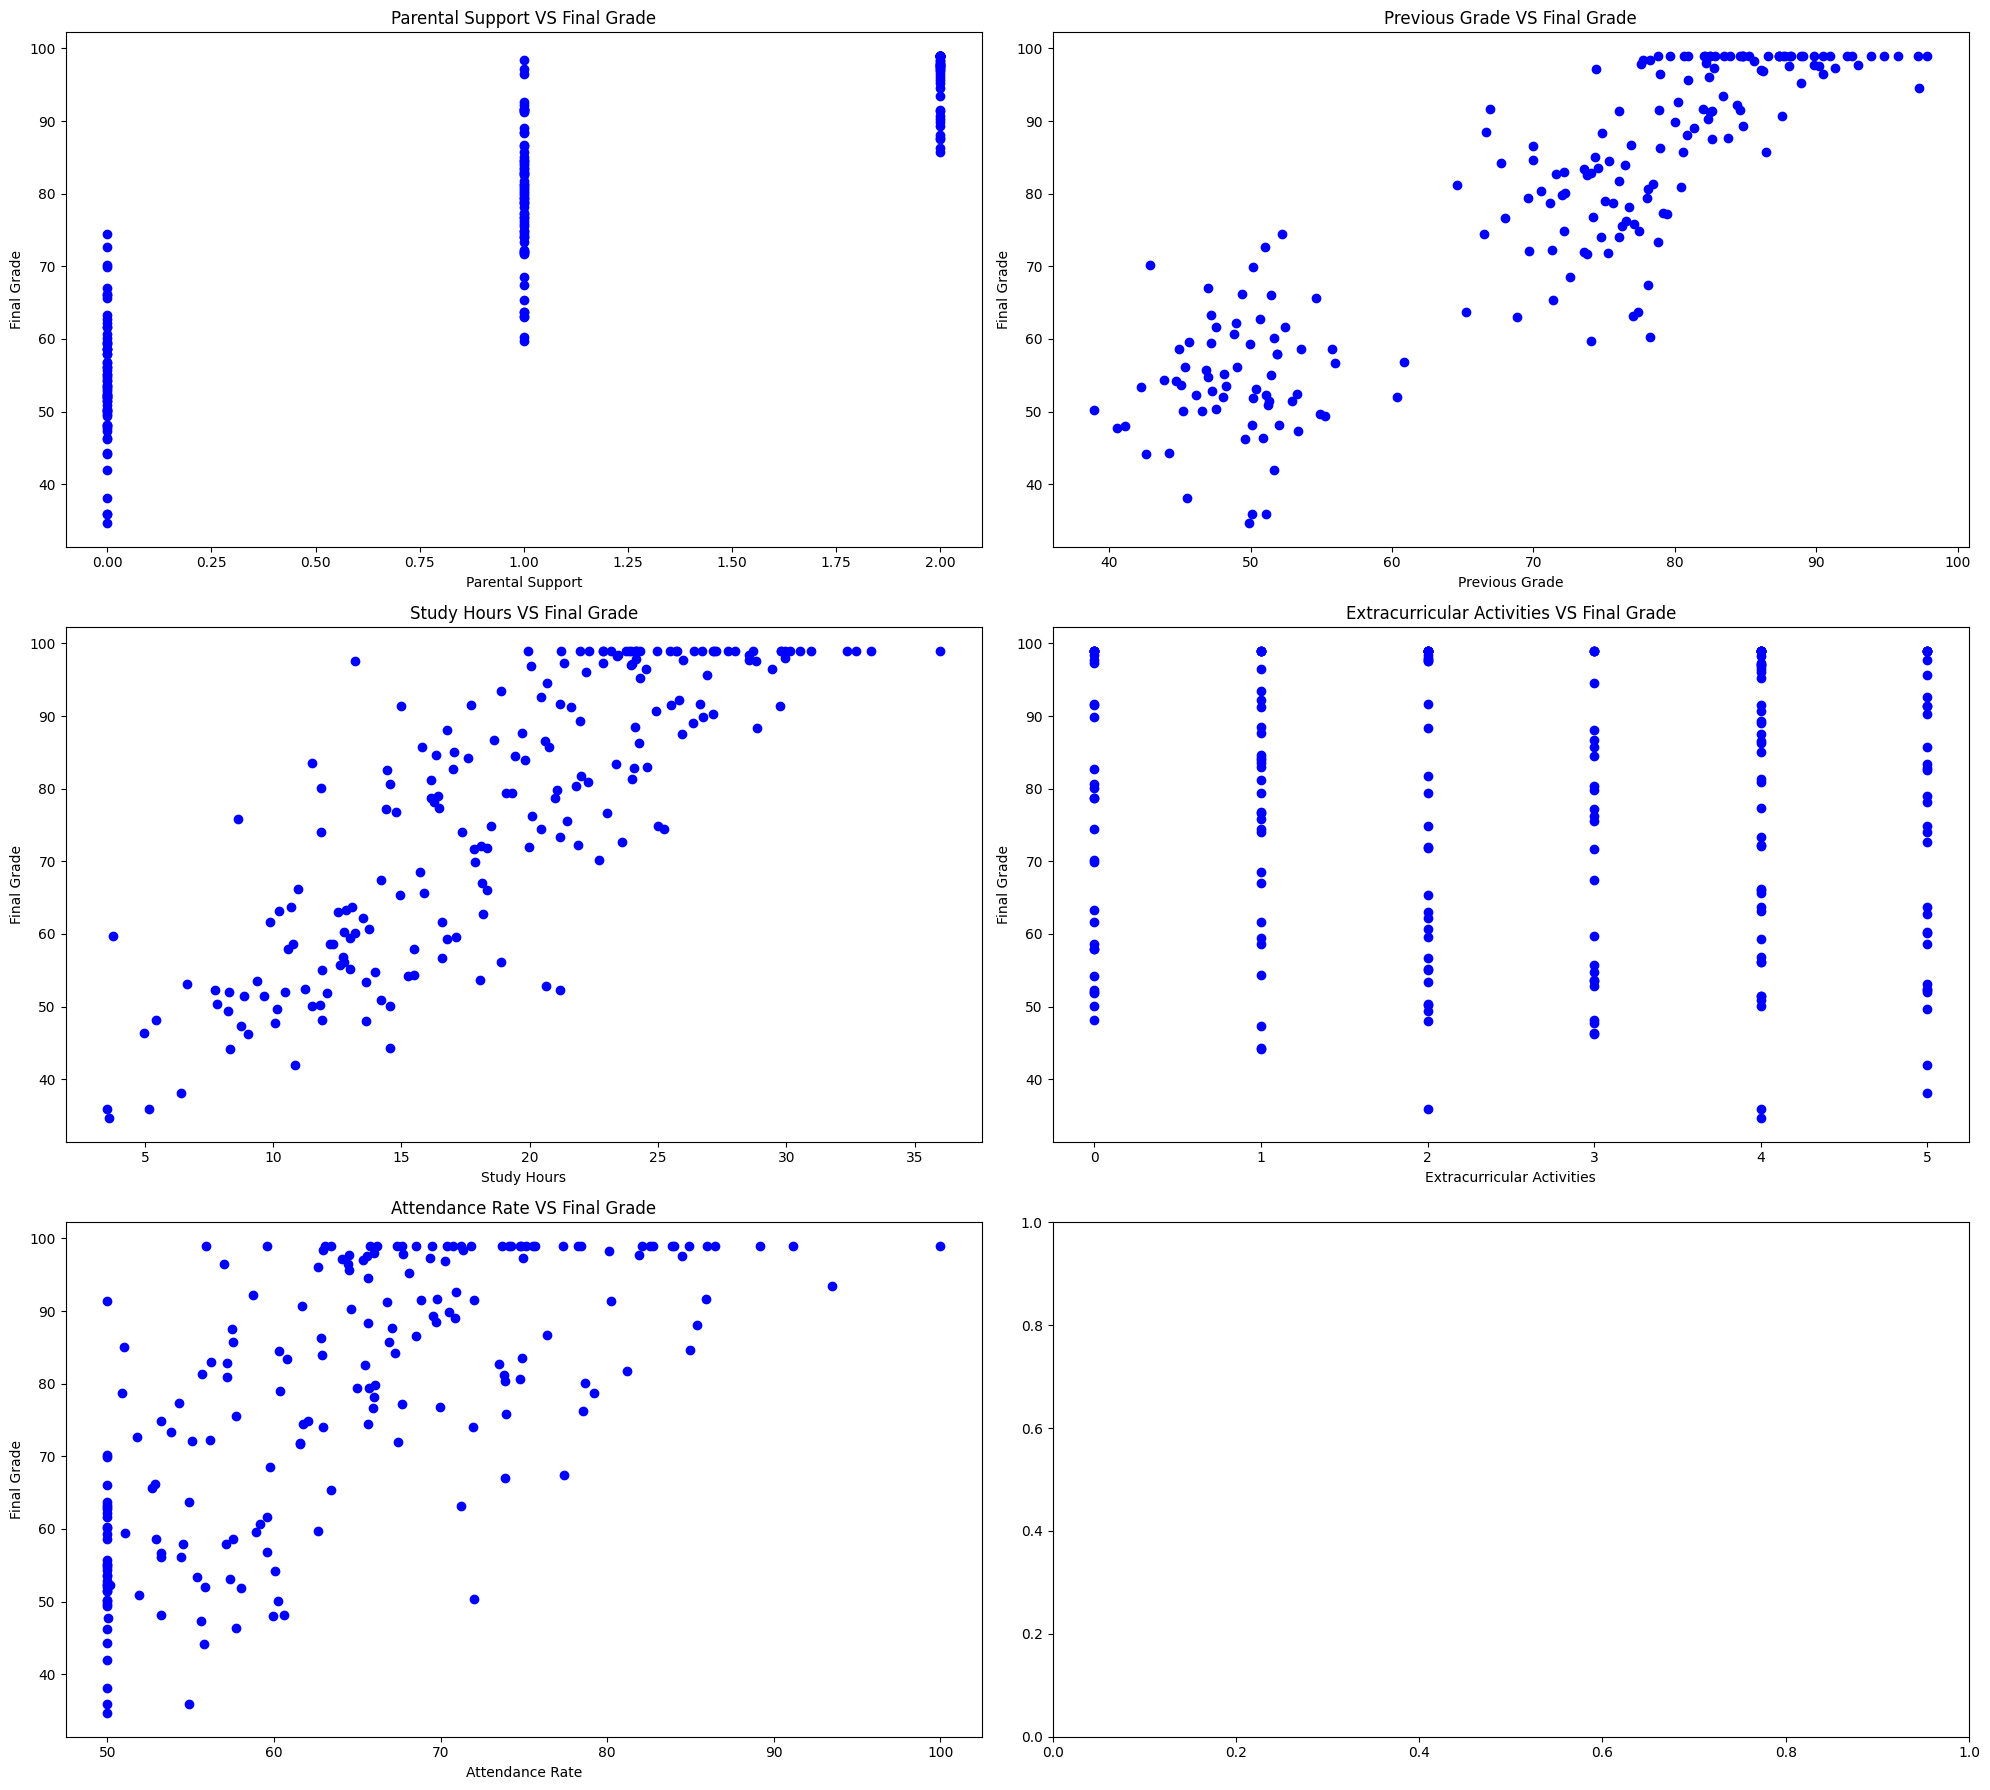

In [10]:
# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(3, 2, figsize=(20, 18))  # 1 row, 2 columns, width=12, height=5

ax[0, 0].scatter(x_train['Parental Support Numeric'],y_train, color = 'blue')
ax[0, 0].set_title('Parental Support VS Final Grade')
ax[0, 0].set_xlabel('Parental Support')
ax[0, 0].set_ylabel('Final Grade')

ax[0, 1].scatter(x_train['Previous Grade'],y_train, color = 'blue')
ax[0, 1].set_title('Previous Grade VS Final Grade')
ax[0, 1].set_xlabel('Previous Grade')
ax[0, 1].set_ylabel('Final Grade')

ax[1, 0].scatter(x_train['Study Hours Per Week'],y_train, color = 'blue')
ax[1, 0].set_title('Study Hours VS Final Grade')
ax[1, 0].set_xlabel('Study Hours')
ax[1, 0].set_ylabel('Final Grade')

ax[1, 1].scatter(x_train['Extracurricular Activities'],y_train, color = 'blue')
ax[1, 1].set_title('Extracurricular Activities VS Final Grade')
ax[1, 1].set_xlabel('Extracurricular Activities')
ax[1, 1].set_ylabel('Final Grade')

ax[2, 0].scatter(x_train['Attendance Rate'],y_train, color = 'blue')
ax[2, 0].set_title('Attendance Rate VS Final Grade')
ax[2, 0].set_xlabel('Attendance Rate')
ax[2, 0].set_ylabel('Final Grade')

plt.tight_layout()  # Adjust spacing to fit both plots nicely
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
score = model.score(x_test,y_test)

In [14]:
print(f'mean square error: {mse}')
print(f'r2 score: {r2}')
print(f'score: {score}')

mean square error: 2.0688666100326255e-28
r2 score: 1.0
score: 1.0


<h2>Please Donot Run this section</h2>
<h4>change the file name if you need to run this</h4>
<p>Original file name is model.pkl<p>

In [15]:
import pickle
with open('../models/model45.pkl','wb') as f:
    pickle.dump(model,f)

In [16]:
with open ('../models/model45.pkl','rb') as f:
    load = pickle.load(f)

y_load = load.predict(x_test)
print(f'The mean squared error is: {mean_squared_error(y_test, y_load)}')
print(f'The R2 score is: {r2_score(y_test,y_load)}')
print(f'The score is: {load.score(x_test, y_test)}')

The mean squared error is: 2.0688666100326255e-28
The R2 score is: 1.0
The score is: 1.0


In [17]:
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test['Final Grade'].iloc[i]}")

Predicted: [71.32271526], Actual: 71.32271526384318
Predicted: [99.], Actual: 99.0
Predicted: [77.69124082], Actual: 77.69124082262864
Predicted: [75.92522203], Actual: 75.92522202760009
Predicted: [58.90379875], Actual: 58.90379875490366
